### Title: Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using 
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution

In [1]:
import numpy as np
import pandas as pd

In [2]:
dict={"roll_no":[1,2,3,4,5],
     "names":['siddhi','priya','sejal','anju','vidhi'],
     "mathm":[60,70,80,90,np.nan],
     "dsm":[70,80,90,np.nan,60],
     "ccm":[80,90,np.nan,60,70],
     "cs":[90,np.nan,60,70,80],
     "an":[np.nan,60,70,80,90]}

In [3]:
df=pd.DataFrame(dict)

In [4]:
df.head()

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,NaN
1,2,priya,70.0,80.0,90.0,NaN,60.0
2,3,sejal,80.0,90.0,NaN,60.0,70.0
3,4,anju,90.0,NaN,60.0,70.0,80.0
4,5,vidhi,NaN,60.0,70.0,80.0,90.0


In [5]:
df.tail()

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,NaN
1,2,priya,70.0,80.0,90.0,NaN,60.0
2,3,sejal,80.0,90.0,NaN,60.0,70.0
3,4,anju,90.0,NaN,60.0,70.0,80.0
4,5,vidhi,NaN,60.0,70.0,80.0,90.0


In [6]:
df.describe()

,roll_no,mathm,dsm,ccm,cs,an
count,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,3.000000,75.000000,75.000000,75.000000,75.000000,75.000000
std,1.581139,12.909944,12.909944,12.909944,12.909944,12.909944
min,1.000000,60.000000,60.000000,60.000000,60.000000,60.000000
25%,2.000000,67.500000,67.500000,67.500000,67.500000,67.500000
50%,3.000000,75.000000,75.000000,75.000000,75.000000,75.000000
75%,4.000000,82.500000,82.500000,82.500000,82.500000,82.500000
max,5.000000,90.000000,90.000000,90.000000,90.000000,90.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   roll_no  5 non-null      int64  
 1   names    5 non-null      object 
 2   mathm    4 non-null      float64
 3   dsm      4 non-null      float64
 4   ccm      4 non-null      float64
 5   cs       4 non-null      float64
 6   an       4 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 408.0+ bytes


In [8]:
df.isnull()

,roll_no,names,mathm,dsm,ccm,cs,an
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False


In [9]:
df.isnull().sum()

roll_no    0
names      0
mathm      1
dsm        1
ccm        1
cs         1
an         1
dtype: int64

In [10]:
df.duplicated().sum()

0

#### fill techniques

In [11]:
df['ccm']=df['ccm'].fillna(df['ccm'].mean())

In [12]:
df['ccm']

0    80.0
1    90.0
2    75.0
3    60.0
4    70.0
Name: ccm, dtype: float64

In [13]:
df['cs']=df['cs'].fillna(df['cs'].median())

In [14]:
df['cs']

0    90.0
1    75.0
2    60.0
3    70.0
4    80.0
Name: cs, dtype: float64

In [16]:
df['an']=df['an'].fillna(df['an'].mode())

In [17]:
df['an']

0    60.0
1    60.0
2    70.0
3    80.0
4    90.0
Name: an, dtype: float64

In [18]:
df.fillna(0)

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,60.0
1,2,priya,70.0,80.0,90.0,75.0,60.0
2,3,sejal,80.0,90.0,75.0,60.0,70.0
3,4,anju,90.0,0.0,60.0,70.0,80.0
4,5,vidhi,0.0,60.0,70.0,80.0,90.0


In [19]:
df.fillna(method ='pad')

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,60.0
1,2,priya,70.0,80.0,90.0,75.0,60.0
2,3,sejal,80.0,90.0,75.0,60.0,70.0
3,4,anju,90.0,90.0,60.0,70.0,80.0
4,5,vidhi,90.0,60.0,70.0,80.0,90.0


In [22]:
df.fillna(method='bfill')

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,60.0
1,2,priya,70.0,80.0,90.0,75.0,60.0
2,3,sejal,80.0,90.0,75.0,60.0,70.0
3,4,anju,90.0,60.0,60.0,70.0,80.0
4,5,vidhi,NaN,60.0,70.0,80.0,90.0


In [23]:
df['dsm'] = df['dsm'].replace( np.nan , 33)
df

,roll_no,names,mathm,dsm,ccm,cs,an
0,1,siddhi,60.0,70.0,80.0,90.0,60.0
1,2,priya,70.0,80.0,90.0,75.0,60.0
2,3,sejal,80.0,90.0,75.0,60.0,70.0
3,4,anju,90.0,33.0,60.0,70.0,80.0
4,5,vidhi,NaN,60.0,70.0,80.0,90.0


### outliers

In [25]:
df1=pd.read_csv("boston_housing.csv")

In [26]:
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [27]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [29]:
df1.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [30]:
df1.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df1.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [34]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x1a6fd365c30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6fd3661d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6fd365a80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6fd366770>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6fd366a40>],
 'means': []}

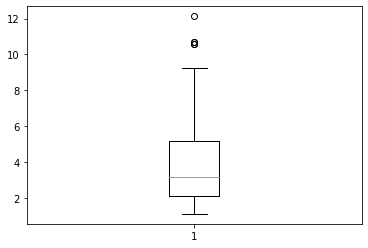

In [36]:
plt.boxplot(df1['dis']) 

In [37]:
import seaborn as sns

<AxesSubplot:>

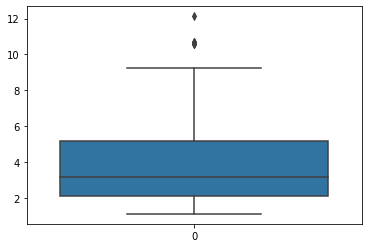

In [38]:
sns.boxplot(df1['dis']) 

In [40]:
#position of the outlier 
print(np.where(df1['dis']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [42]:
from scipy import stats
z=np.abs(stats.zscore(df1['dis']))

In [43]:
z


0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: dis, Length: 506, dtype: float64

In [44]:
threshold=3
print(np.where(z>3))

(array([351, 352, 353, 354, 355], dtype=int64),)


#### IQR

In [47]:
Q1=np.percentile(df1['dis'],25,interpolation='midpoint')

Q3=np.percentile(df1['dis'],75,interpolation='midpoint')

In [48]:
IQR=Q3-Q1

In [49]:
IQR

3.0646000000000004

In [51]:
upper = np.where(df1['dis'] >= (Q3+1.5*IQR))
 
print("Upper bound:",upper)


Upper bound: (array([351, 352, 353, 354, 355], dtype=int64),)


In [52]:
lower = np.where(df1['dis'] <= (Q1-1.5*IQR))
 
print("lower bound:",lower)


lower bound: (array([], dtype=int64),)


In [53]:
print("old shape",df1.shape)

old shape (506, 14)


In [54]:
#removing outliers
df1.drop(upper[0],inplace=True)
df1.drop(lower[0],inplace=True)


In [55]:
print("newshape",df1.shape)

newshape (501, 14)


<AxesSubplot:>

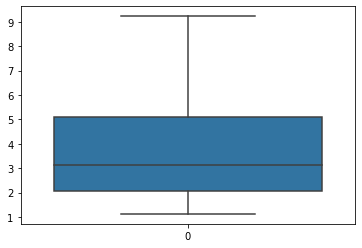

In [58]:
sns.boxplot(df1['dis'])

## data tranformation

In [60]:
Xmin = df1['black'].min()
Xmin

0.32

In [61]:
Xmax = df1['black'].max()
Xmax

396.9

In [63]:
Xnew = (df1['black'] - Xmin)/(Xmax - Xmin)


In [64]:
Xnew

0      1.000000
1      1.000000
2      0.989737
3      0.994276
4      1.000000
         ...   
501    0.987619
502    1.000000
503    1.000000
504    0.991301
505    1.000000
Name: black, Length: 501, dtype: float64

In [65]:
df['black'] = Xnew

#### Skwness

In [68]:
df2=pd.read_csv("Iris1.csv")

In [69]:
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
skewness=df2['SepalLengthCm'].skew(axis=0,skipna=True)

In [63]:
skewness

0.3149109566369728